# Week 7: Regressiemodellen in Machine Learning

## Bibliotheken importeren

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pyodbc

## Data inlezen en kolommen selecteren

In [4]:
# df = pd.read_csv("titanic.csv")
# df
DB_DWH = {"servername": r"localhost,1433", "database": "dwh", "username": "sa", "password": "iDTyjZx7dRL4"}

dwh_conn = pyodbc.connect(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={DB_DWH['servername']};"
    f"DATABASE={DB_DWH['database']};"
    f"UID={DB_DWH['username']};"
    f"PWD={DB_DWH['password']}"
)



In [5]:
def create_dataframes_sql(connection):
    dictionary : dict = {}
    query : str = ""
    key : str = ""

    query = "SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE';"
    key = "TABLE_NAME"

    table_names = pd.read_sql(query, connection)

    for table in table_names[key].tolist():
        dictionary[table] = pd.read_sql(f"SELECT * FROM {table}", connection)

    return dictionary

dwh = create_dataframes_sql(dwh_conn)

print(list(dwh.keys()))

/var/folders/k4/8yvf4x0n4c15r7pl4lwy8x6m0000gp/T/ipykernel_38727/506354042.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  table_names = pd.read_sql(query, connection)
/var/folders/k4/8yvf4x0n4c15r7pl4lwy8x6m0000gp/T/ipykernel_38727/506354042.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dictionary[table] = pd.read_sql(f"SELECT * FROM {table}", connection)


['sales_staff', 'retailer_site', 'product', 'inventory_levels', 'order_details']


In [3]:
df = df.loc[:, ['Pclass', 'Sex', 'Age']]
df

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,NaN
889,1,male,26.0


## One-hot encoding van onafhankelijke niet-numerieke variabelen

In [4]:
dummies_dataframe = pd.get_dummies(df.loc[:, ['Sex']])
dummies_dataframe

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [5]:
df = pd.concat([df, dummies_dataframe], axis = 1)
df = df.drop(['Sex'], axis = 1)
df = df.loc[:, ['Pclass', 'Sex_female', 'Sex_male', 'Age']]
df

,Pclass,Sex_female,Sex_male,Age
0,3,False,True,22.0
1,1,True,False,38.0
2,3,True,False,26.0
3,1,True,False,35.0
4,3,False,True,35.0
...,...,...,...,...
886,2,False,True,27.0
887,1,True,False,19.0
888,3,True,False,NaN
889,1,False,True,26.0


## Verticaal en horizontaal snijden

In [9]:
X = df.loc[df['Age'].notna(), :]
X = X.drop('Age', axis = 1)
y = df.loc[df['Age'].notna(), ['Age']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass      714 non-null    int64
 1   Sex_female  714 non-null    bool 
 2   Sex_male    714 non-null    bool 
dtypes: bool(2), int64(1)
memory usage: 12.6 KB


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.15,
    random_state = 42
)

## Regressiemodel bouwen

In [11]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)
reg_model

LinearRegression()

In [12]:
y_pred= reg_model.predict(X_test)
y_pred

array([[33.37995048],
       [33.37995048],
       [27.87746844],
       [34.77843685],
       [26.47898207],
       [33.37995048],
       [20.97650004],
       [27.87746844],
       [20.97650004],
       [20.97650004],
       [34.77843685],
       [27.87746844],
       [40.28091888],
       [26.47898207],
       [34.77843685],
       [33.37995048],
       [26.47898207],
       [34.77843685],
       [33.37995048],
       [34.77843685],
       [20.97650004],
       [27.87746844],
       [20.97650004],
       [40.28091888],
       [26.47898207],
       [26.47898207],
       [26.47898207],
       [26.47898207],
       [20.97650004],
       [26.47898207],
       [20.97650004],
       [20.97650004],
       [40.28091888],
       [26.47898207],
       [26.47898207],
       [20.97650004],
       [33.37995048],
       [40.28091888],
       [40.28091888],
       [26.47898207],
       [26.47898207],
       [26.47898207],
       [34.77843685],
       [33.37995048],
       [40.28091888],
       [27

In [13]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns = {0 : 'Predicted_Age'})
prediction_df

,Predicted_Age
0,33.379950
1,33.379950
2,27.877468
3,34.778437
4,26.478982
...,...
103,20.976500
104,27.877468
105,33.379950
106,26.478982


In [14]:
y_test_prediction_merge = pd.concat([y_test.reset_index()['Age'], prediction_df], axis = 1)
y_test_prediction_merge.loc[y_test_prediction_merge['Predicted_Age'].notna(), :]

,Age,Predicted_Age
0,42.0,33.379950
1,3.0,33.379950
2,29.0,27.877468
3,24.0,34.778437
4,43.0,26.478982
...,...,...
103,3.0,20.976500
104,4.0,27.877468
105,34.0,33.379950
106,20.0,26.478982


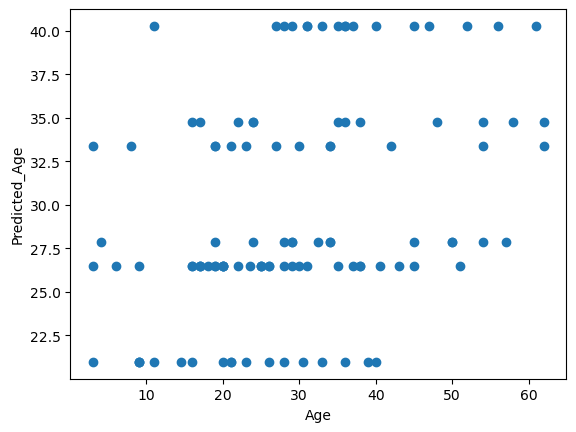

In [15]:
plt.scatter(y_test_prediction_merge['Age'], y_test_prediction_merge['Predicted_Age'])
plt.xlabel('Age')
plt.ylabel('Predicted_Age')
plt.show()

In [16]:
mean_squared_error(y_test_prediction_merge['Age'], y_test_prediction_merge['Predicted_Age'])

173.8613956679155

In [17]:
mean_absolute_error(y_test_prediction_merge['Age'], y_test_prediction_merge['Predicted_Age'])

10.563578545846589